In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mip.display.image import show, read, subplot_images
from typing import List, Tuple

In [2]:
def grad(I: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Computes the gradient of an image I.
    --------
    Parameters:
    I: np.ndarray
    --------
    Returns:
    grad_x: np.ndarray    
    """
    M, N = I.shape
    G = np.zeros((M, N, 2))
    G[:, 1:, 0] = I[:, 1:] - I[:, :-1]
    G[:, 0, 0] = I[:, 0] 
    G[1:, :, 1] = I[1:, :] - I[:-1, :]
    G[0, :, 1] = I[0, :]  
    return G

# grad(np.random.randint(0, 255, (100, 100))).shape

In [3]:
def divergence(G: np.ndarray) -> np.ndarray:
    """
    Computes the divergence of the gradient.
    --------
    Parameters:
    grad_x: np.ndarray
    grad_y: np.ndarray
    --------
    Returns:
    div: np.ndarray    
    """
    # div = np.gradient(G[:, :, 0], axis=1, edge_order=1) + np.gradient(G[:, :, 1], axis=0, edge_order=1)
    # return div
    M, N, _ = G.shape
    p = np.zeros((M, N))
    p[:, :-1] += G[:, :-1, 0]
    p[:, 1:] -= G[:, :-1, 0]
    p[:, 0] = -G[:, 0, 0]
    p[:-1, :] += G[:-1, :, 1]
    p[1:, :] -= G[:-1, :, 1]
    p[0, :] = -G[0, :, 1]
    return p


# div(np.random.randint(0, 255, (100, 100, 2)))

In [4]:
def total_variation_denoising(
    f: np.ndarray, lambda_reg: float, tau: float, n_iter: int, epsilon: float
) -> np.ndarray:
    u = f.copy()
    for _ in range(n_iter):
        grad_u = grad(u)
        grad_magnitude = np.sqrt(grad_u**2 + epsilon**2)
        norm_grad = grad_u / grad_magnitude
        div = divergence(norm_grad)
        u = u - tau * (u - f + lambda_reg * div)
    return u

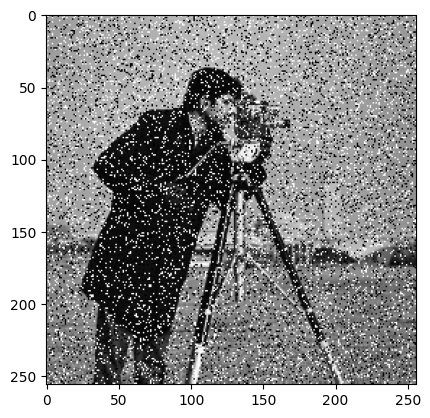

In [5]:
# Example usage:
lambda_reg = 0.1
tau = 0.1
n_iter = 100
epsilon = 1e-8


img = read(r"../assets/cameraman_sp.png", 'GRAY')

u_denoised = total_variation_denoising(img, lambda_reg, tau, n_iter, epsilon)

plt.imshow(u_denoised, cmap='gray')

# I_zeropad_1 = zero_padding(img, 1)

# I_zeropad_2 = zero_padding(img, 2)

# I_zeropad_5 = zero_padding(img, 5)

# subplot_images([img,  I_zeropad_1, I_zeropad_2, I_zeropad_5], 
#                titles=['Original Image', 'Zero padded 1', 'Zero padded 2', 'Zero padded 5'])

In [ ]:
def ROF_primal_dual(I, lambd_reg):
    